In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

In [11]:
#Data from vizier without treatment
raw_data = pd.read_csv(r"C:\Users\clauw\Documents\Programming\NIR_data_vizier.tsv", delimiter='\t',names=["Wave (cm)", "nFlux", "rFlux"])

In [12]:
#Convert the wavelength in A cause its in cm^-1 
raw_data['Wave A'] = (10**(8))/raw_data['Wave (cm)']

#Invert the values for the index in python
raw_data = raw_data.sort_values('Wave A', ascending=True, na_position='first').reset_index(drop=True)

raw_data

,Wave (cm),nFlux,rFlux,Wave A
0,9999.998732,0.996949,0.134761,10000.001268
1,9999.996849,0.997237,0.134800,10000.003151
2,9999.994966,0.997245,0.134802,10000.005034
3,9999.993083,0.996937,0.134760,10000.006917
4,9999.991199,0.997067,0.134778,10000.008801
...,...,...,...,...
3001255,4347.829323,0.944661,0.015909,22999.982882
3001256,4347.827440,0.938258,0.015800,22999.992845
3001257,4347.825556,0.934484,0.015736,23000.002807
3001258,4347.823673,0.930303,0.015666,23000.012770


In [25]:
#Lines from the excel
raw_lambda = pd.read_csv(r"C:\Users\clauw\Documents\Programming\Final-Project\Infrared range\Nave list NIR",delimiter='\t',names=['lambda', 'class'])
raw_lambda['Nave list'] = (10**8)/raw_lambda['lambda']
raw_lambda = raw_lambda[raw_lambda['Nave list'].between(10000,23001,inclusive='neither')]
raw_lambda = raw_lambda[raw_lambda['class']=='A'].reset_index(drop=True)
raw_lambda

,lambda,class,Nave list
0,9977.511,A,10022.539690
1,9975.027,A,10025.035521
2,9971.253,A,10028.829877
3,9964.517,A,10035.609353
4,9955.970,A,10044.224721
...,...,...,...
1849,4378.553,A,22838.595308
1850,4375.952,A,22852.170225
1851,4368.958,A,22888.752879
1852,4354.970,A,22962.270693


### Wavelength classification

In [26]:
#between work like < or > but not the equal, reset the index for the other functions
data_10000_11000 = raw_data[raw_data['Wave A'].between(10000, 11000, inclusive='neither')].reset_index(drop=True)
data_11000_12000 = raw_data[raw_data['Wave A'].between(11000, 12000, inclusive='neither')].reset_index(drop=True)
data_12000_13000 = raw_data[raw_data['Wave A'].between(12000, 13000, inclusive='neither')].reset_index(drop=True)
data_13000_14000 = raw_data[raw_data['Wave A'].between(13000, 14000, inclusive='neither')].reset_index(drop=True)
data_14000_15000 = raw_data[raw_data['Wave A'].between(14000, 15000, inclusive='neither')].reset_index(drop=True)
data_15000_16000 = raw_data[raw_data['Wave A'].between(15000, 16000, inclusive='neither')].reset_index(drop=True)
data_16000_17000 = raw_data[raw_data['Wave A'].between(16000, 17000, inclusive='neither')].reset_index(drop=True)
data_17000_18000 = raw_data[raw_data['Wave A'].between(17000, 18000, inclusive='neither')].reset_index(drop=True)
data_18000_19000 = raw_data[raw_data['Wave A'].between(18000, 19000, inclusive='neither')].reset_index(drop=True)
data_19000_20000 = raw_data[raw_data['Wave A'].between(19000, 20000, inclusive='neither')].reset_index(drop=True)
data_20000_21000 = raw_data[raw_data['Wave A'].between(20000, 21000, inclusive='neither')].reset_index(drop=True)
data_21000_22000 = raw_data[raw_data['Wave A'].between(21000, 22000, inclusive='neither')].reset_index(drop=True)
data_22000_23000 = raw_data[raw_data['Wave A'].between(22000, 23000, inclusive='neither')].reset_index(drop=True)

data_18000_19000

,Wave (cm),nFlux,rFlux,Wave A
0,5555.554433,0.001446,0.000672,18000.003638
1,5555.552549,0.001507,0.000701,18000.009740
2,5555.550666,0.001631,0.000758,18000.015842
3,5555.548783,0.001799,0.000836,18000.021944
4,5555.546900,0.001839,0.000855,18000.028045
...,...,...,...,...
155256,5263.165677,0.001592,0.000689,18999.971905
155257,5263.163794,0.001293,0.000560,18999.978703
155258,5263.161911,0.001108,0.000479,18999.985502
155259,5263.160028,0.001212,0.000524,18999.992300


In [27]:
#Now from lambda
lambda_10000_11000 = raw_lambda[raw_lambda['Nave list'].between(10000, 11000, inclusive='neither')].reset_index(drop=True)
lambda_11000_12000 = raw_lambda[raw_lambda['Nave list'].between(11000, 12000, inclusive='neither')].reset_index(drop=True)
lambda_12000_13000 = raw_lambda[raw_lambda['Nave list'].between(12000, 13000, inclusive='neither')].reset_index(drop=True)
lambda_13000_14000 = raw_lambda[raw_lambda['Nave list'].between(13000, 14000, inclusive='neither')].reset_index(drop=True)
lambda_14000_15000 = raw_lambda[raw_lambda['Nave list'].between(14000, 15000, inclusive='neither')].reset_index(drop=True)
lambda_15000_16000 = raw_lambda[raw_lambda['Nave list'].between(15000, 16000, inclusive='neither')].reset_index(drop=True)
lambda_16000_17000 = raw_lambda[raw_lambda['Nave list'].between(16000, 17000, inclusive='neither')].reset_index(drop=True)
lambda_17000_18000 = raw_lambda[raw_lambda['Nave list'].between(17000, 18000, inclusive='neither')].reset_index(drop=True)
lambda_18000_19000 = raw_lambda[raw_lambda['Nave list'].between(18000, 19000, inclusive='neither')].reset_index(drop=True)
lambda_19000_20000 = raw_lambda[raw_lambda['Nave list'].between(19000, 20000, inclusive='neither')].reset_index(drop=True)
lambda_20000_21000 = raw_lambda[raw_lambda['Nave list'].between(20000, 21000, inclusive='neither')].reset_index(drop=True)
lambda_21000_22000 = raw_lambda[raw_lambda['Nave list'].between(21000, 22000, inclusive='neither')].reset_index(drop=True)
lambda_22000_23000 = raw_lambda[raw_lambda['Nave list'].between(22000, 23000, inclusive='neither')].reset_index(drop=True)


lambda_15000_16000

,lambda,class,Nave list
0,6666.380,A,15000.645028
1,6665.624,A,15002.346367
2,6663.061,A,15008.117140
3,6662.575,A,15009.211904
4,6661.427,A,15011.798523
...,...,...,...
326,6255.828,A,15985.094219
327,6255.299,A,15986.446052
328,6252.921,A,15992.525733
329,6252.815,A,15992.796844


### Find the minimums and the closer line of the Fe I line


In [28]:
#Find the minimum or the lambda in the spectrum
def find_minimums(wave,flux,lamda):
    #The function find_peaks just got the index of the points
    #The minus if for the minimums, without it are the maximums
    minimums,_ = find_peaks(-flux) 
    mindf = pd.DataFrame([]) #Make a dataframe
    mindf['min_wave'] = wave[minimums]
    mindf['min_flux'] = flux[minimums]

    #Take the closer line with the absolute value of the difference between the minimums and the line
    #This step dont include the closer points that are not minimums
    closer = []
    for each in lamda:
        mindf['abs'] = np.abs(mindf['min_wave']-each)
        closer.append(mindf.loc[mindf['abs'] == min(mindf['abs'])]) #take all the row

    #Dataframe with the marks for the closer lines of Fe
    closer_data = pd.concat(closer,axis=0).reset_index(drop=True)
    closer_data['Fe line'] = lamda

    return closer_data.drop(['abs'],axis=1)

#Closer lines
closer_lines_10000_11000 = find_minimums(data_10000_11000['Wave A'],data_10000_11000['nFlux'],lambda_10000_11000['Nave list'])
closer_lines_11000_12000 = find_minimums(data_11000_12000['Wave A'],data_11000_12000['nFlux'],lambda_11000_12000['Nave list'])
closer_lines_12000_13000 = find_minimums(data_12000_13000['Wave A'],data_12000_13000['nFlux'],lambda_12000_13000['Nave list'])
closer_lines_13000_14000 = find_minimums(data_13000_14000['Wave A'],data_13000_14000['nFlux'],lambda_13000_14000['Nave list'])
closer_lines_14000_15000 = find_minimums(data_14000_15000['Wave A'],data_14000_15000['nFlux'],lambda_14000_15000['Nave list'])
closer_lines_15000_16000 = find_minimums(data_15000_16000['Wave A'],data_15000_16000['nFlux'],lambda_15000_16000['Nave list'])
closer_lines_16000_17000 = find_minimums(data_16000_17000['Wave A'],data_16000_17000['nFlux'],lambda_16000_17000['Nave list'])
closer_lines_17000_18000 = find_minimums(data_17000_18000['Wave A'],data_17000_18000['nFlux'],lambda_17000_18000['Nave list'])
closer_lines_18000_19000 = find_minimums(data_18000_19000['Wave A'],data_18000_19000['nFlux'],lambda_18000_19000['Nave list'])
closer_lines_19000_20000 = find_minimums(data_19000_20000['Wave A'],data_19000_20000['nFlux'],lambda_19000_20000['Nave list'])
closer_lines_20000_21000 = find_minimums(data_20000_21000['Wave A'],data_20000_21000['nFlux'],lambda_20000_21000['Nave list'])
closer_lines_21000_22000 = find_minimums(data_21000_22000['Wave A'],data_21000_22000['nFlux'],lambda_21000_22000['Nave list'])
closer_lines_22000_23000 = find_minimums(data_22000_23000['Wave A'],data_22000_23000['nFlux'],lambda_22000_23000['Nave list'])

closer_lines_10000_11000

,min_wave,min_flux,Fe line
0,10022.532502,0.946571,10022.539690
1,10025.030255,0.957562,10025.035521
2,10028.834148,0.965678,10028.829877
3,10035.604601,0.942222,10035.609353
4,10044.238228,0.918650,10044.224721
...,...,...,...
78,10943.243347,0.847738,10943.236992
79,10949.907305,0.921681,10949.759111
80,10951.976067,0.957433,10951.993252
81,10979.670023,0.891460,10979.669824


In [29]:
#Localize the line and save the width for lines
def width_minimums(closer_lines,data,width):
    local_points =[]
    for each in closer_lines['min_wave']:
        #This append all the part of the dataframe in that range
        local_points.append(data[data['Wave A'].between(each-width, each+width, inclusive='neither')])

    return local_points

#Data
local_points_10000_11000 = width_minimums(closer_lines_10000_11000,data_10000_11000,0.3)
local_points_11000_12000 = width_minimums(closer_lines_11000_12000,data_11000_12000,0.3)
local_points_12000_13000 = width_minimums(closer_lines_12000_13000,data_12000_13000,0.3)
local_points_13000_14000 = width_minimums(closer_lines_13000_14000,data_13000_14000,0.3)
local_points_14000_15000 = width_minimums(closer_lines_14000_15000,data_14000_15000,0.3)
local_points_15000_16000 = width_minimums(closer_lines_15000_16000,data_15000_16000,0.3)
local_points_16000_17000 = width_minimums(closer_lines_16000_17000,data_16000_17000,0.3)
local_points_17000_18000 = width_minimums(closer_lines_17000_18000,data_17000_18000,0.3)
local_points_18000_19000 = width_minimums(closer_lines_18000_19000,data_18000_19000,0.3)
local_points_19000_20000 = width_minimums(closer_lines_19000_20000,data_19000_20000,0.3)
local_points_20000_21000 = width_minimums(closer_lines_20000_21000,data_20000_21000,0.3)
local_points_21000_22000 = width_minimums(closer_lines_21000_22000,data_21000_22000,0.3)
local_points_22000_23000 = width_minimums(closer_lines_22000_23000,data_22000_23000,0.3)

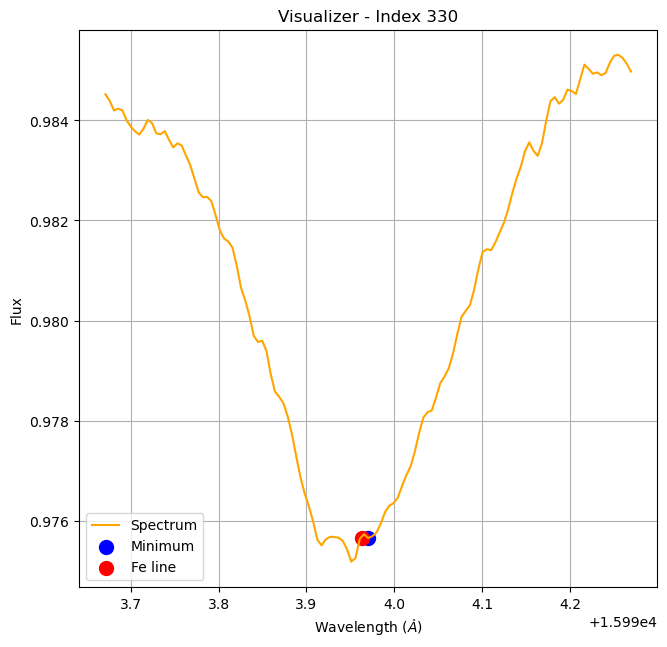

In [37]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import numpy as np

class OutlierViewer:
    def __init__(self, root, local_points, closer_line):
        self.root = root
        self.root.title("Visualizador Interactivo")
        self.local_points = local_points
        self.closer_line = closer_line
        self.index = closer_line.index.values
        self.current_index = 0
       
        self.setup_ui()
        self.update_plot()
    
    def setup_ui(self):
        main_frame = ttk.Frame(self.root, padding="10")
        main_frame.pack(fill=tk.BOTH, expand=True)
        
        control_frame = ttk.Frame(main_frame)
        control_frame.pack(fill=tk.X, pady=10)
        
        ttk.Label(control_frame, text="Índice de Outlier:").pack(side=tk.LEFT, padx=5)
        self.slider = ttk.Scale(
            control_frame,
            from_=0,
            to=len(self.index)-1,
            orient=tk.HORIZONTAL,
            command=self.on_slider_move
        )
        self.slider.pack(side=tk.LEFT, expand=True, fill=tk.X, padx=5)
        
        self.spinbox = ttk.Spinbox(
            control_frame,
            from_=0,
            to=len(self.index)-1,
            width=5,
            command=self.on_spinbox_change
        )
        self.spinbox.pack(side=tk.LEFT, padx=5)
        self.spinbox.bind("<Return>", self.on_spinbox_change)
        
        nav_frame = ttk.Frame(control_frame)
        nav_frame.pack(side=tk.LEFT, padx=10)
        
        ttk.Button(nav_frame, text="← Anterior", command=self.prev_plot).pack(side=tk.LEFT)
        ttk.Button(nav_frame, text="Siguiente →", command=self.next_plot).pack(side=tk.LEFT, padx=5)
     
        graph_frame = ttk.Frame(main_frame)
        graph_frame.pack(fill=tk.BOTH, expand=True)
       
        self.fig, self.ax = plt.subplots(figsize=(10, 6))
        self.canvas = FigureCanvasTkAgg(self.fig, master=graph_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
        self.toolbar = NavigationToolbar2Tk(self.canvas, graph_frame)
        self.toolbar.update()
        self.canvas._tkcanvas.pack(fill=tk.BOTH, expand=True)
    
    def on_slider_move(self, event=None):
        self.current_index = int(float(self.slider.get()))
        self.spinbox.delete(0, tk.END)
        self.spinbox.insert(0, str(self.current_index))
        self.update_plot()
    
    def on_spinbox_change(self, event=None):
        try:
            new_index = int(self.spinbox.get())
            if 0 <= new_index < len(self.index):
                self.current_index = new_index
                self.slider.set(self.current_index)
                self.update_plot()
        except ValueError:
            pass
    
    def prev_plot(self):
        if self.current_index > 0:
            self.current_index -= 1
            self.slider.set(self.current_index)
            self.spinbox.delete(0, tk.END)
            self.spinbox.insert(0, str(self.current_index))
            self.update_plot()
    
    def next_plot(self):
        if self.current_index < len(self.index)-1:
            self.current_index += 1
            self.slider.set(self.current_index)
            self.spinbox.delete(0, tk.END)
            self.spinbox.insert(0, str(self.current_index))
            self.update_plot()
    
    #Graficas
    def update_plot(self):
        j = self.current_index
        self.ax.clear()
        
        # Gráfica principal
        self.ax.plot(
            self.local_points[j]['Wave A'],
            self.local_points[j]['nFlux'],
            color='orange',
            label='Spectrum'
        )
        
        #Closer lines
        self.ax.scatter(
            self.closer_line['min_wave'][j],
            self.closer_line['min_flux'][j],
            color='blue',
            label='Minimum',
            s = 100,
        )
        
        #Puntos de la lista de Fe
        self.ax.scatter(
            self.closer_line['Fe line'][j],
            self.closer_line['min_flux'][j],
            color='red',
            label='Fe line',
            s=100
        )
        
        #Vainitas del gráfico
        self.ax.set_title(f'Visualizer - Index {self.index[j]}')
        self.ax.set_xlabel(r'Wavelength $(\mathring{A})$')
        self.ax.set_ylabel('Flux')
        self.ax.legend()
        self.ax.grid(True)
        
        self.canvas.draw()


if __name__ == "__main__":
    root = tk.Tk()
    root.geometry("900x700")

    app = OutlierViewer(root, local_points_15000_16000, closer_lines_15000_16000)

    root.mainloop()

## Lines to drop in the excel

In [ ]:
index_to_drop_10000_11000 = [1,4,5,12,42,55,60,62,64,70,71,73,78,79,80,81,82]

index_11000_12000 = np.concatenate([closer_lines_10000_11000.index.values,np.array([0,2,10,38,39,40,53,64,65,78,84,86])])
index_to_drop_11000_12000 = index_11000_12000[ np.bincount(index_11000_12000)[index_11000_12000] != 2]

index_to_drop_12000_13000 = [0,1,2,3,6,7,8,9,10,11,13,14,15,17,20,21,22,23,24,25,26,27,28,29,31,33,
                             37,38,39,46,47,51,52,54,55,56,58,61,62,63,64,66,68,71,72,74,76,77,78,79]

index_13000_14000 = np.concatenate([closer_lines_13000_14000.index.values,np.array([2,4,15,22,33,39])])
index_to_drop_13000_14000 = index_13000_14000[ np.bincount(index_13000_14000)[index_13000_14000] != 2]

index_14000_15000 = np.concatenate([closer_lines_14000_15000.index.values,np.array([39,88,104,117,118,124,144,155,159,160,161,205,
                                209,228,229,244,254,256,260,261])])
index_to_drop_14000_15000 = index_14000_15000[ np.bincount(index_14000_15000)[index_14000_15000] != 2]

index_15000_16000 = np.concatenate([closer_lines_15000_16000.index.values,np.array([10,20,31,32,33,38,41,43,45,47,50,55,56,58,59,63,64,65,67,72,77,80,81,
                                82,83,87,89,90,93,95,101,102,104,110,115,116,120,124,125,126,127,128,129,
                                134,139,140,143,144,145,147,148,149,152,153,155,157,158,159,160,161,163,164,
                                166,167,168,169,170,173,177,178,180,182,183,187,189,190,192,194,196,197,200,
                                203,204,205,211,212,214,215,218,229,230,233,237,239,242,244,245,246,248,249,251,
                                254,256,257,258,262,264,266,267,269,270,274,276,280,281,287,289,291,294,297,298,301,
                                306,307,308,312,315,316,318,322,325,327,330])])
index_to_drop_15000_16000 = index_15000_16000[ np.bincount(index_15000_16000)[index_15000_16000] != 2]

# closer_lines_10000_11000.take(index_to_drop_10000_11000)['Fe line']


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  34,  35,  36,  37,  39,  40,  42,  44,  46,  48,
        49,  51,  52,  53,  54,  57,  60,  61,  62,  66,  68,  69,  70,
        71,  73,  74,  75,  76,  78,  79,  84,  85,  86,  88,  91,  92,
        94,  96,  97,  98,  99, 100, 103, 105, 106, 107, 108, 109, 111,
       112, 113, 114, 117, 118, 119, 121, 122, 123, 130, 131, 132, 133,
       135, 136, 137, 138, 141, 142, 146, 150, 151, 154, 156, 162, 165,
       171, 172, 174, 175, 176, 179, 181, 184, 185, 186, 188, 191, 193,
       195, 198, 199, 201, 202, 206, 207, 208, 209, 210, 213, 216, 217,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 231, 232, 234,
       235, 236, 238, 240, 241, 243, 247, 250, 252, 253, 255, 259, 260,
       261, 263, 265, 268, 271, 272, 273, 275, 277, 278, 279, 282, 283,
       284, 285, 286, 288, 290, 292, 293, 295, 296, 299, 300, 30